# 0. Importação de bibliotecas e Leitura das bases

In [1]:
import geopandas as gpd # Leitura e manipulação de dados
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos 

In [2]:
cnuc = gpd.read_file("areas-PA/areas-de-interesse/cnuc/cnuc_pa_dados.shp")
quilombola = gpd.read_file("areas-PA/areas-de-interesse/quilombola/quilombola_pa_dados.shp")
tis = gpd.read_file("areas-PA/areas-de-interesse/tis/tis_pa_dados.shp")

In [3]:
print("CNUC: {}, Quilombola: {}, TIS: {}".format(cnuc.shape[0], quilombola.shape[0], tis.shape[0]))

CNUC: 96, Quilombola: 84, TIS: 51


In [4]:
cnuc.sample(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry
45,AREA DE RELEVANTE INTERESSE ECOLOGICO PARQUE A...,3.75,PARÁ,ananindeua,Ativo,0.000000e+00,0,0.000000e+00,0,"POLYGON ((-48.40709 -1.38528, -48.40709 -1.384..."
6,RESERVA EXTRATIVISTA SÃO JOÃO DA PONTA,3409.47,PARÁ,sao joao da ponta,Ativo,2.318029e+05,13,0.000000e+00,0,"POLYGON ((-47.97406 -0.76569, -47.974 -0.76582..."
0,FLORESTA NACIONAL DE ITAITUBA II,397750.04,PARÁ,"itaituba , trairao",Ativo,2.918622e+08,46,4.133187e+07,157,"MULTIPOLYGON (((-56.18763 -4.77936, -56.22483 ..."
23,PARQUE ESTADUAL DA SERRA DOS MARTÍRIOS/ANDORINHAS,25031.5,PARÁ,sao geraldo do araguaia,Ativo,2.466237e+07,101,4.402120e+03,3,"POLYGON ((-48.5165 -6.09831, -48.50823 -6.1021..."
16,FLORESTA NACIONAL DO JAMANXIM,1301551.62,PARÁ,"itaituba , novo progresso",Ativo,7.264551e+09,454,4.967942e+08,646,"POLYGON ((-55.76796 -6.35064, -55.68677 -6.354..."


In [5]:
quilombola.sample(5)

,nm_comunid,nm_municip,nr_familia,nr_area_ha,a_sigef,c_sigef,a_alertas,c_alertas,geometry
36,"ABUI, PARANA DO ABUI, TAPAGEM, SAGRADO CORACAO",oriximina,182.0,79095.5912,8.097535e+08,3,136007.82,6,"POLYGON ((-56.88891 -1.32879, -56.88874 -1.329..."
1,CAMIRANGA,cachoeira do piria,39.0,320.6121,2.917039e+05,5,0.00,0,"POLYGON ((-46.26632 -1.81096, -46.28319 -1.817..."
2,ALTO TROMBETAS II,oriximina,243.0,103871.2778,3.325327e+06,2,10801261.34,41,"MULTIPOLYGON (((-56.4222 -1.57448, -56.42239 -..."
6,TININGU,santarem,85.0,3857.8096,5.558014e+07,18,231828.26,3,"POLYGON ((-54.44362 -2.55816, -54.44362 -2.558..."
27,TIPITINGA,santa luzia do para / braganca,27.0,633.4357,9.471532e+04,3,0.00,0,"POLYGON ((-46.92995 -1.33475, -46.9391 -1.3390..."


In [6]:
tis.sample(5)

,etnia_nome,municipio,a_sigef,c_sigef,a_alertas,c_alertas,geometry
33,Mundurukú,itaituba,0.00,0,0.00,0,"POLYGON ((-55.97674 -4.25101, -55.97575 -4.252..."
5,Arara do Pará,senador jose porfirio,7918940.55,11,1108715.93,54,"MULTIPOLYGON (((-51.76837 -3.57551, -51.76839 ..."
10,Mundurukú,belterra,1933970.47,14,58006.14,4,"POLYGON ((-55.10755 -3.0137, -55.10728 -3.0139..."
37,Amanayé,ipixuna do para,554649.51,3,3185900.72,60,"POLYGON ((-47.90453 -3.02698, -47.90452 -3.027..."
44,Asurini do Tocantins,tucurui,23451.96,3,0.00,0,"POLYGON ((-49.82637 -3.64418, -49.82278 -3.649..."


In [7]:
# Transformando m2 em km2

cnuc["area_sigef_km2"] = cnuc["a_sigef"].astype(float) / 1000000
cnuc["a_alertas_km2"] = cnuc["a_alertas"].astype(float) / 1000000
quilombola["area_sigef_km2"] = quilombola["a_sigef"].astype(float) / 1000000
quilombola["a_alertas_km2"] = quilombola["a_alertas"].astype(float) / 1000000
tis["area_sigef_km2"] = tis["a_sigef"].astype(float) / 1000000
tis["a_alertas_km2"] = tis["a_alertas"].astype(float) / 1000000

/tmp/ipykernel_72511/3073168017.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


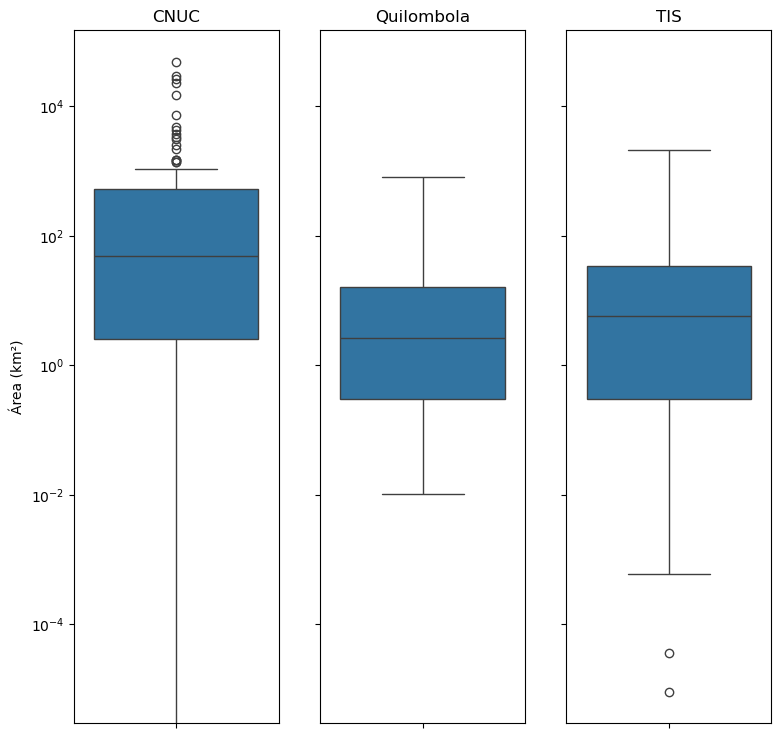

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="area_sigef_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")
axes[0].set_yscale('log')

sns.boxplot(quilombola, y="area_sigef_km2", ax=axes[1])
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="area_sigef_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

/tmp/ipykernel_72511/1376393022.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


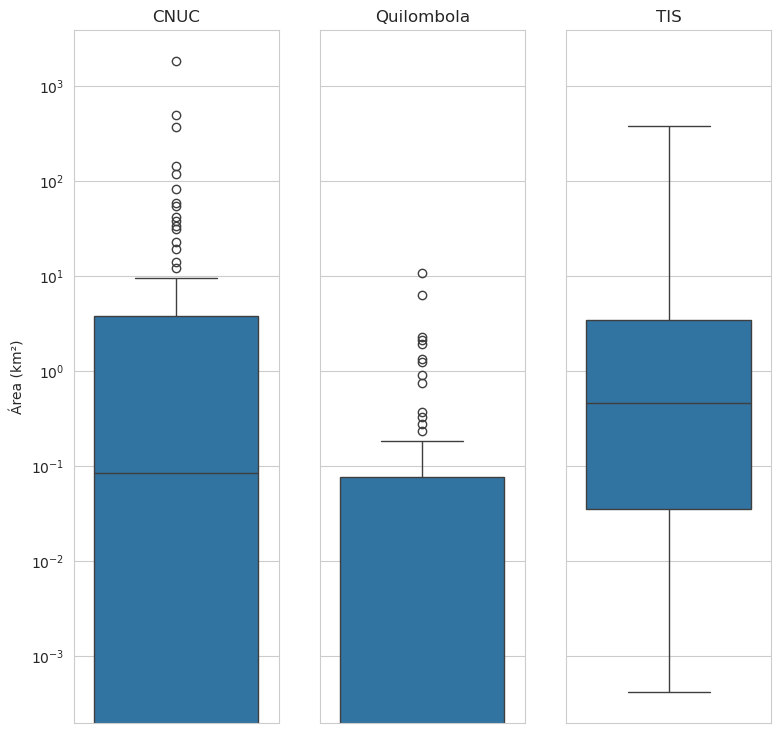

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(9, 9), sharey=True)

sns.set_style("whitegrid")

sns.boxplot(cnuc, y="a_alertas_km2", ax=axes[0])
axes[0].set_title("CNUC")
axes[0].set_ylabel("Área (km²)")

sns.boxplot(quilombola, y="a_alertas_km2", ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title("Quilombola")
axes[1].set_ylabel("Área (km²)")

sns.boxplot(tis, y="a_alertas_km2", ax=axes[2])
axes[2].set_title("TIS")
axes[2].set_ylabel("Área (km²)")

fig.show()

In [10]:
cnuc.sort_values("area_sigef_km2", ascending=False).head(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry,area_sigef_km2,a_alertas_km2
25,ÁREA DE PROTEÇÃO AMBIENTAL DO ARQUIPÉLAGO DO M...,4524746.89,PARÁ,"afua , anajas , breves , cachoeira do arari , ...",Ativo,4.871608e+10,7305,1.413882e+07,626,"MULTIPOLYGON (((-51.01778 -0.83416, -51.01729 ...",48716.078169,14.138818
40,FLORESTA ESTADUAL DO PARU,3610013.42,PARÁ,"alenquer , almeirim , monte alegre , obidos",Ativo,2.961114e+10,487,3.924614e+06,44,"MULTIPOLYGON (((-54.49512 -1.15571, -54.49513 ...",29611.135317,3.924614
94,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,3373111.24,PARÁ,"altamira , sao felix do xingu",Ativo,2.585186e+10,247,1.177972e+08,423,"POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...",25851.858773,117.797232
41,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,1679623.65,PARÁ,"altamira , sao felix do xingu",Ativo,2.300491e+10,3382,1.810395e+09,2960,"POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...",23004.908674,1810.394948
18,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,2040313.63,PARÁ,"itaituba , jacareacanga , novo progresso , tra...",Ativo,1.484493e+10,1011,3.696307e+08,3031,"MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...",14844.928463,369.630673


In [11]:
cnuc.sort_values("a_alertas_km2", ascending=False).head(5)

,nome_uc,ha_total,uf,municipio,situacao,a_sigef,c_sigef,a_alertas,c_alertas,geometry,area_sigef_km2,a_alertas_km2
41,ÁREA DE PROTEÇÃO AMBIENTAL TRIUNFO DO XINGU,1679623.65,PARÁ,"altamira , sao felix do xingu",Ativo,2.300491e+10,3382,1.810395e+09,2960,"POLYGON ((-52.75802 -6.07755, -52.75614 -6.076...",23004.908674,1810.394948
16,FLORESTA NACIONAL DO JAMANXIM,1301551.62,PARÁ,"itaituba , novo progresso",Ativo,7.264551e+09,454,4.967942e+08,646,"POLYGON ((-55.76796 -6.35064, -55.68677 -6.354...",7264.551137,496.794176
18,ÁREA DE PROTEÇÃO AMBIENTAL DO TAPAJÓS,2040313.63,PARÁ,"itaituba , jacareacanga , novo progresso , tra...",Ativo,1.484493e+10,1011,3.696307e+08,3031,"MULTIPOLYGON (((-57.63393 -6.12859, -57.63381 ...",14844.928463,369.630673
74,FLORESTA NACIONAL DE ALTAMIRA,725418.14,PARÁ,"altamira , itaituba , trairao",Ativo,3.791692e+08,54,1.453858e+08,278,"POLYGON ((-54.91714 -5.4026, -54.66689 -6.3180...",379.169202,145.385838
94,ESTAÇÃO ECOLÓGICA DA TERRA DO MEIO,3373111.24,PARÁ,"altamira , sao felix do xingu",Ativo,2.585186e+10,247,1.177972e+08,423,"POLYGON ((-52.98983 -5.48073, -52.99272 -5.481...",25851.858773,117.797232


In [12]:
alertas = gpd.read_file("areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp")
alertas.sample(5)

/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: areas-PA/area-alertas-filtrado/alertas_pa/alertas_pa_filtrado.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


,CODEALERTA,FONTE,BIOMA,ESTADO,MUNICIPIO,AREAHA,ANODETEC,DATADETEC,DTIMGANT,DTIMGDEP,DTPUBLI,VPRESSAO,geometry
14355,120296,"{DETERB-AMAZONIA,SAD}",Amazônia,PARÁ,uruara,5.11,2020.0,2020-03-01,2019-11-06,2020-03-23,2020-05-25,agriculture,"MULTIPOLYGON (((-53.47768 -3.96295, -53.47779 ..."
95580,1291150,{SIRADX},Amazônia,PARÁ,anapu,8.36,2024.0,2024-07-01,2024-04-22,2024-08-24,2024-10-03,agriculture,"MULTIPOLYGON (((-51.41638 -3.69323, -51.41602 ..."
93509,1257232,{SAD},Amazônia,PARÁ,goianesia do para,8.30,2024.0,2024-06-01,2021-08-08,2022-07-29,2024-08-12,agriculture,"POLYGON ((-48.92983 -4.25607, -48.92962 -4.256..."
70225,413726,"{DETERB-AMAZONIA,SAD}",Amazônia,PARÁ,sao felix do xingu,85.10,2021.0,2021-08-01,2021-06-29,2021-10-06,2021-09-25,agriculture,"MULTIPOLYGON (((-51.4902 -6.10226, -51.49054 -..."
55554,671685,{SAD},Amazônia,PARÁ,alenquer,1.36,2022.0,2022-07-01,2022-07-24,2022-07-27,2022-10-24,agriculture,"POLYGON ((-55.2711 -1.44213, -55.27083 -1.4421..."


In [13]:
alertas_f = alertas[alertas["MUNICIPIO"].isin(["altamira", "sao felix do xingu"])]
alertas_f.sample(5)

,CODEALERTA,FONTE,BIOMA,ESTADO,MUNICIPIO,AREAHA,ANODETEC,DATADETEC,DTIMGANT,DTIMGDEP,DTPUBLI,VPRESSAO,geometry
59671,65105,{SAD},Amazônia,PARÁ,sao felix do xingu,9.67,2019.0,2019-10-01,2019-07-29,2019-10-26,2020-02-11,agriculture,"POLYGON ((-52.93516 -6.2688, -52.93499 -6.2687..."
95001,1290109,{SIRADX},Amazônia,PARÁ,altamira,13.02,2024.0,2024-02-01,2023-10-18,2024-02-14,2024-10-03,agriculture,"MULTIPOLYGON (((-55.22817 -6.39323, -55.22769 ..."
52335,2732,"{DETERB-AMAZONIA,SAD}",Amazônia,PARÁ,sao felix do xingu,89.16,2019.0,2019-05-01,2018-10-19,2019-05-29,2020-02-11,agriculture,"POLYGON ((-53.35842 -6.56496, -53.35801 -6.565..."
18458,210662,{SIRADX},Amazônia,PARÁ,sao felix do xingu,7.06,2020.0,2020-07-01,2020-05-21,2020-08-14,2020-10-20,agriculture,"MULTIPOLYGON (((-51.127 -5.29502, -51.12707 -5..."
56940,404766,{SAD},Amazônia,PARÁ,altamira,44.58,2021.0,2021-07-01,2021-04-07,2021-09-07,2021-08-21,agriculture,"MULTIPOLYGON (((-53.41253 -6.15597, -53.4127 -..."


In [14]:
alertas_f.to_file("areas-PA/area-alertas-filtrado/reserva/reserva_alertas.shp")

/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DATADETEC create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DTIMGANT create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DTIMGDEP create as date field, though DateTime requested.
  ogr_write(
/home/toledo-cia/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Field DTPUBLI create as date field, though DateTime requested.
  ogr_write(


In [15]:
sigef = gpd.read_file("areas-PA/area-imovel-filtrado/sigef_pa/sigef_pa_filtrado.shp")
sigef.sample(5) 

,cod_imovel,ind_tipo,municipio,num_area,geometry
170677,PA-1508100-1E640B6D2F024623A83493B79E90BCE4,IRU,tucurui,42.3363,"POLYGON ((-49.95768 -3.93738, -49.97332 -3.938..."
41735,PA-1501253-3D8D564C061B43EAB7557D0F4E8B2AA4,IRU,bannach,44.3526,"POLYGON ((-50.39369 -7.43352, -50.39339 -7.433..."
194496,PA-1500602-7FA803E7F97B49D08B0ED44DB2FB09FC,IRU,altamira,242.8365,"POLYGON ((-54.43134 -9.07236, -54.42292 -9.071..."
135509,PA-1501303-5E81973B6A6A4FE3B40EF0F8D9F8EDA7,IRU,barcarena,13.2459,"POLYGON ((-48.49738 -1.62539, -48.49442 -1.623..."
184122,PA-1505502-A813E5C5C5F84A2BA0EE9DF723472437,IRU,paragominas,1.2548,"POLYGON ((-47.656 -2.76319, -47.65598 -2.76421..."


In [16]:
sigef_f = sigef[sigef["municipio"].isin(["altamira", "sao felix do xingu"])]
sigef_f.sample(5)

,cod_imovel,ind_tipo,municipio,num_area,geometry
191586,PA-1507300-6630B62D694C4BE99949E1C11EDBBA12,IRU,sao felix do xingu,82.5086,"POLYGON ((-52.75728 -6.31887, -52.75187 -6.319..."
46047,PA-1500602-BEE98053D79F4BA58423A30A51EB862F,IRU,altamira,115.7805,"POLYGON ((-52.01277 -3.47817, -52.01247 -3.479..."
206858,PA-1507300-231FBBB5E48C4BB389D36C7581384FCB,IRU,sao felix do xingu,26.3752,"POLYGON ((-51.51624 -6.21186, -51.51531 -6.217..."
127110,PA-1507300-F5B25C24C7D243A08471B3BAACB6A48A,IRU,sao felix do xingu,676.1371,"POLYGON ((-52.6786 -6.32187, -52.66924 -6.3217..."
126034,PA-1507300-B01AFD85E6BE4DB9A71A89A72125040A,IRU,sao felix do xingu,51.9799,"POLYGON ((-51.80794 -6.316, -51.80793 -6.33254..."


In [17]:
sigef_f.to_file("areas-PA/area-imovel-filtrado/reserva/reserva_sigef.shp")